#### Загрузка и подготовка данных для анализа

In [2]:
import pandas as pd


df = pd.read_csv("data/cardio_cleared.csv", index_col="id")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  float64
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 6.9 MB


#### Изучение особенностей данных

In [3]:
df.describe().T

count        mean        std         min        25%  \
age          70000.0   53.304309   6.755152   29.564122   48.36272   
gender       70000.0    1.349571   0.476838    1.000000    1.00000   
height       70000.0  164.407179   7.825729  142.500000  159.00000   
weight       70000.0   73.925678  13.442403   39.500000   65.00000   
ap_hi        70000.0  126.712329  16.385978   90.000000  120.00000   
ap_lo        70000.0   81.779500   9.062702   65.000000   80.00000   
cholesterol  70000.0    1.366871   0.680250    1.000000    1.00000   
gluc         70000.0    1.226457   0.572270    1.000000    1.00000   
smoke        70000.0    0.088129   0.283484    0.000000    0.00000   
alco         70000.0    0.053771   0.225568    0.000000    0.00000   
active       70000.0    0.803729   0.397179    0.000000    1.00000   
cardio       70000.0    0.499700   0.500003    0.000000    0.00000   

                    50%         75%         max  
age           53.945351   58.391742   64.924433  
gender         1.000000    2.000000    2.000000  
height       165.000000  170.000000  186.500000  
weight        72.000000   82.000000  107.500000  
ap_hi        120.000000  140.000000  170.000000  
ap_lo         80.000000   90.000000  105.000000  
cholesterol    1.000000    2.000000    3.000000  
gluc           1.000000    1.000000    3.000000  
smoke          0.000000    0.000000    1.000000  
alco           0.000000    0.000000    1.000000  
active         1.000000    1.000000    1.000000  
cardio         0.000000    1.000000    1.000000

#### Подготовка набора данных для логистической регрессии

In [4]:
from sklearn.model_selection import train_test_split

random_state = 111

y = df['cardio']
X = df.drop(['cardio'], axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)

#### Обучение модели логистической регрессии

In [5]:
import statsmodels.api as sm

log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()
log_result.summary2()

Optimization terminated successfully.
         Current function value: 0.558956
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.194     
Date:               2025-04-24 12:35 AIC:              66539.7930
No. Observations:   59500            BIC:              66647.7178
Df Model:           11               Log-Likelihood:   -33258.   
Df Residuals:       59488            LL-Null:          -41242.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.4326   0.2628 -43.5042 0.0000 -11.9476 -10.9175
age             0.0516   0.0015  35.4059 0.0000   0.0488   0.0545
gender         -0.0108   0.0239  -0.4517 0.6515  -0.0578   0.0361
height         -0.0044   0.0015  -2.9849 0.0028  -0.0073  -0.0015
weight          0.0127   0.0008  16.1397 0.0000   0.0112   0.0142
ap_hi           0.0513   0.0010  53.9067 0.0000   0.0494   0.0531
ap_lo           0.0209   0.0016  13.2392 0.0000   0.0178   0.0240
cholesterol     0.4943   0.0168  29.4509 0.0000   0.4614   0.5272
gluc           -0.1228   0.0191  -6.4363 0.0000  -0.1602  -0.0854
smoke          -0.1673   0.0373  -4.4795 0.0000  -0.2405  -0.0941
alco           -0.1905   0.0453  -4.2020 0.0000  -0.2794  -0.1017
active         -0.2193   0.0236  -9.2954 0.0000  -0.2655  -0.1730
=================================================================

"""

#### Вычисление экспоненты значения для колонки Coef. признаков

In [6]:
import numpy as np

np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.639380
age            1.052978
ap_hi          1.052618
ap_lo          1.021103
weight         1.012780
height         0.995579
gender         0.989241
gluc           0.884462
smoke          0.845973
alco           0.826514
active         0.803100
const          0.000011
dtype: float64

#### Вычисление среднего квадратичного отклонения значений признаков

In [7]:
np.std(X_train, 0)

age             6.758844
gender          0.476715
height          7.821231
weight         13.472656
ap_hi          16.366878
ap_lo           9.071287
cholesterol     0.682134
gluc            0.571848
smoke           0.284051
alco            0.225918
active          0.397418
dtype: float64

#### Вычисление значимости признаков относительно текущей модели

Признак const был добавлен искусственно и должен быть исключен из рассмотрения

Признак gender имеет небольшую статистическую значимость (P>|z| = 0.6515, много больше 5 %) и поэтому исключается из рассмотрения

In [14]:
coefs = log_result.params.drop(labels=["const","gender"])
stdv = np.std(X_train, 0).drop(labels="gender")
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.839295
age            0.348905
cholesterol    0.337191
ap_lo          0.189439
weight         0.171091
active         0.087144
gluc           0.070209
smoke          0.047513
alco           0.043046
height         0.034657
dtype: float64

#### Предсказание результатов для тестового набора

In [24]:
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
y_pred

array([0.13125979, 0.49786805, 0.20710282, ..., 0.19630195, 0.94034541,
       0.71424584])

#### Оценка качества классификации

In [25]:
from sklearn import metrics

y_pred_bin = (y_pred > 0.5).astype(int)
f1 = metrics.f1_score(y_test, y_pred_bin)
f1

0.7128055527612916

#### Результат конкретного случая № 68325

In [26]:
current_id = 68325
hl_index = X_test.index.get_loc(current_id)

display(X_test.iloc[hl_index])
display(y_pred[hl_index])

age             60.521849
gender           1.000000
height         158.000000
weight          62.000000
ap_hi          130.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
Name: 68325, dtype: float64

0.5640039376306355

#### Получение данных для определения границы решения

Построение графиков зависимости параметров для определения границы решения

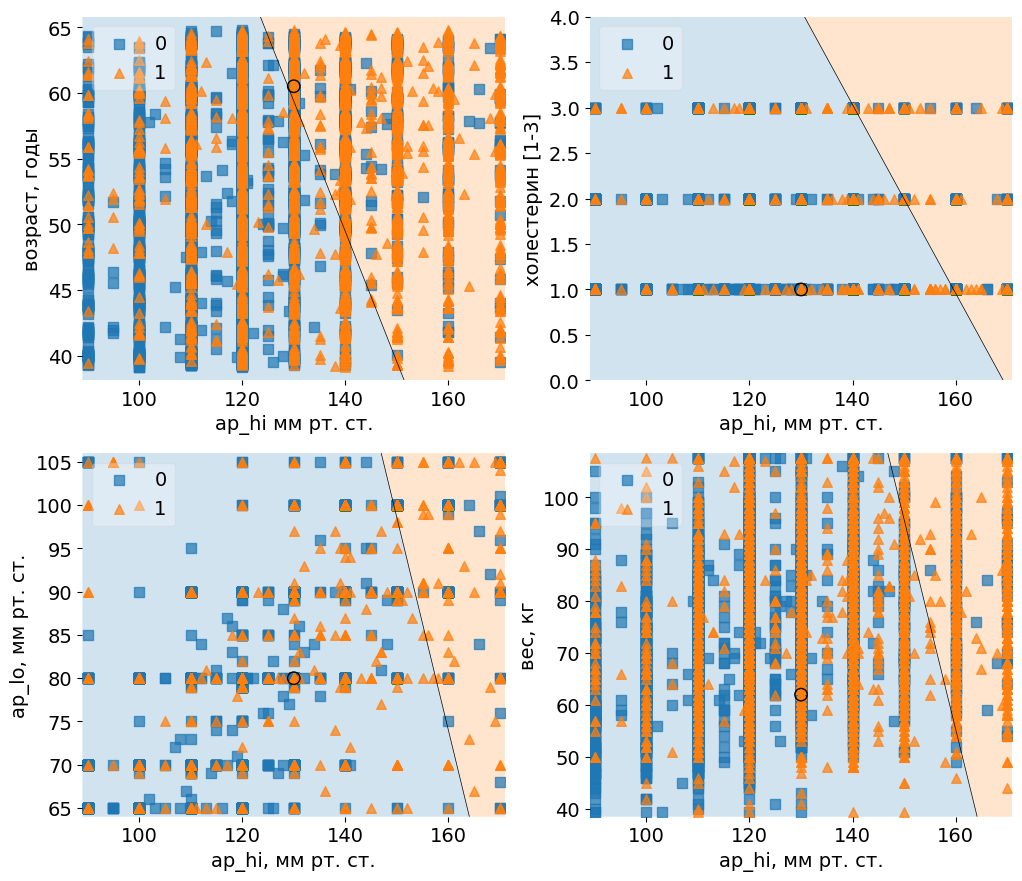

In [ ]:
import matplotlib.pyplot as plt

from plots import create_decision_plot

filter = {
    "age": (30, 35),
    "gender": (1, 2),
    "height": (165, 40),
    "weight": (57, 50),
    "ap_hi": (115, 60),
    "ap_lo": (75, 40),
    "cholesterol": (1, 3),
    "gluc": (1, 3),
    "smoke": (0, 2),
    "alco": (0, 2),
    "active": (1, 2),
}

plt.rcParams.update({"font.size": 14})
fig, axarr = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=False)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "age"],
    ["ap_hi мм рт. ст.", "возраст, годы"],
    hl_index,
    filter,
    ax=axarr.flat[0],
)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "cholesterol"],
    ["ap_hi, мм рт. ст.", "холестерин [1-3]"],
    hl_index,
    filter,
    ax=axarr.flat[1],
)
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["ap_hi", "ap_lo"],
    ["ap_hi, мм рт. ст.", "ap_lo, мм рт. ст."],
    hl_index,
    filter,
    ax=axarr.flat[2],
)
create_decision_plot(
    X_test,
    y_test,
    log_result, 
    ["ap_hi", "weight"],
    ["ap_hi, мм рт. ст.", "вес, кг"],
    hl_index,
    filter,
    ax=axarr.flat[3],
)
plt.subplots_adjust(top=1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

#### Построение графика для определения зависимости между ростом и весом

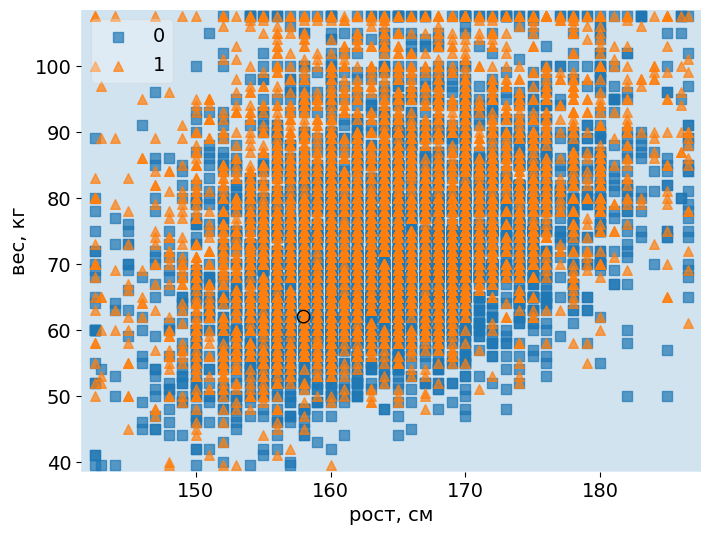

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
create_decision_plot(
    X_test,
    y_test,
    log_result,
    ["height", "weight"],
    ["рост, см", "вес, кг"],
    hl_index,
    filter,
    ax=ax,
)
plt.show()

#### Добавление расчета индекса массы тела

In [29]:
X2 = df.drop(["cardio"], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"] / 100) ** 2
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.15, random_state=random_state)

#### Визуализация зависимости роста, веса и ИМТ

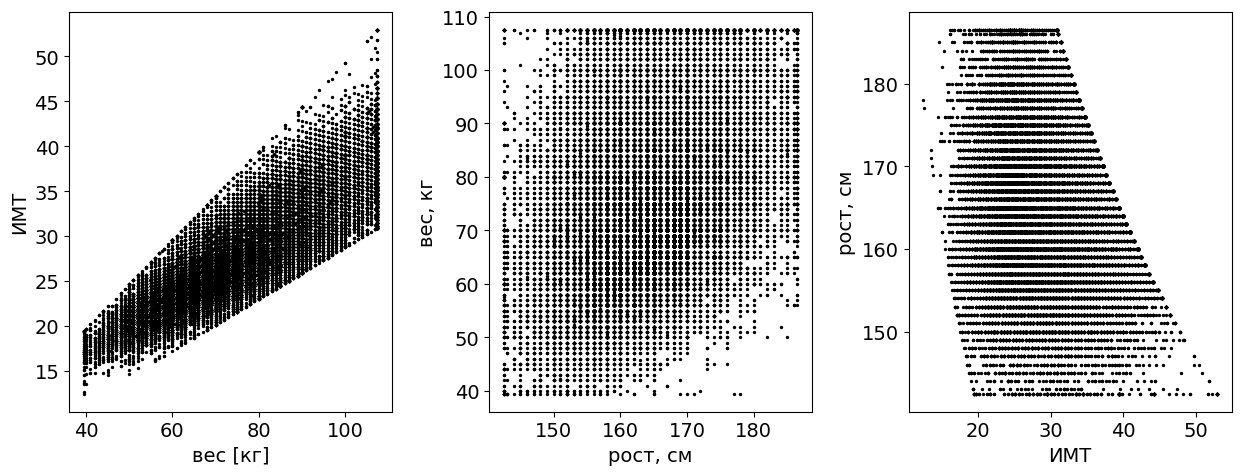

In [30]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
axs[0].scatter(X2["weight"], X2["bmi"], color='black', s=2)
axs[0].set_xlabel('вес [кг]')
axs[0].set_ylabel('ИМТ')
axs[1].scatter(X2["height"], X2["weight"], color='black', s=2)
axs[1].set_xlabel('рост, см')
axs[1].set_ylabel('вес, кг')
axs[2].scatter(X2["bmi"], X2["height"], color='black', s=2)
axs[2].set_xlabel('ИМТ')
axs[2].set_ylabel('рост, см')
plt.subplots_adjust(top = 1, bottom=0, hspace=0.2, wspace=0.3)
plt.show()

#### Обучение новой модели с учетом ИМТ

In [31]:
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.558954
         Iterations 6


#### Визуализация зависимости давления ap_hi от ИМТ

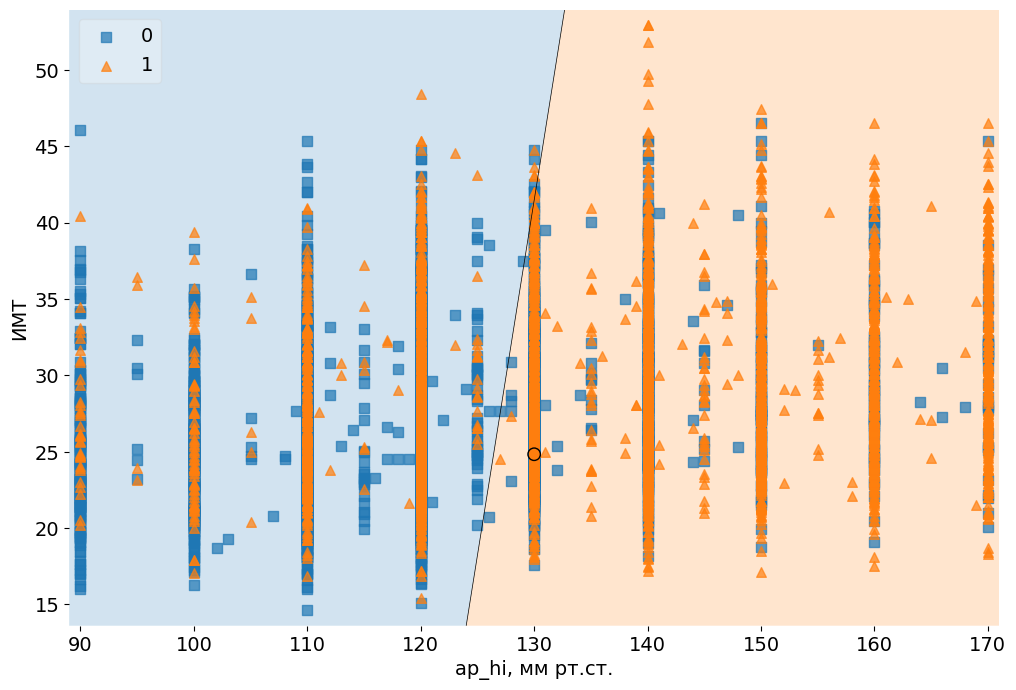

In [ ]:
X2_filter = {
    "age": (60, 35),
    "gender": (1, 2),
    "height": (160, 120),
    "weight": (60, 150),
    "ap_hi": (120, 140),
    "ap_lo": (80, 70),
    "cholesterol": (1, 3),
    "gluc": (1, 3),
    "smoke": (0, 2),
    "alco": (0, 2),
    "active": (1, 2),
    "bmi": (20, 60),
}

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
create_decision_plot(
    X2_test,
    y_test,
    log_result2,
    ["ap_hi", "bmi"],
    ["ap_hi, мм рт.ст.", "ИМТ"],
    hl_index,
    X2_filter,
    ax=ax,
)
plt.show()